# Tony Ding's Lab1
USC ID#:8961530140


Question (a) Download the Vertebral Column Data Set from: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column. 

Question (b) Pre-Processing and Exploratory data analysis:

i. Make scatterplots of the independent variables in the dataset. Use color to
show Classes 0 and 1.

In [2]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.preprocessing import LabelEncoder
#from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix as confusion_matrix
from sklearn.metrics import classification_report as creport
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math


In [3]:
data = arff.loadarff(open('../data/vertebral_column_data/column_2C_weka.arff'))
df_pre = pd.DataFrame(data[0])


In [4]:
df = df_pre.rename(columns={"pelvic_incidence":"PI","pelvic_tilt":"PT","lumbar_lordosis_angle":"LLA",
                   "sacral_slope":"SS","pelvic_radius":"PR","degree_spondylolisthesis":"DS",
                   "class":"C"})
df


,PI,PT,LLA,SS,PR,DS,C
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,b'Normal'
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,b'Normal'
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,b'Normal'
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,b'Normal'


In [5]:
df['C'] = df['C'].map({b'Normal':0, b'Abnormal':1})
df

,PI,PT,LLA,SS,PR,DS,C
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


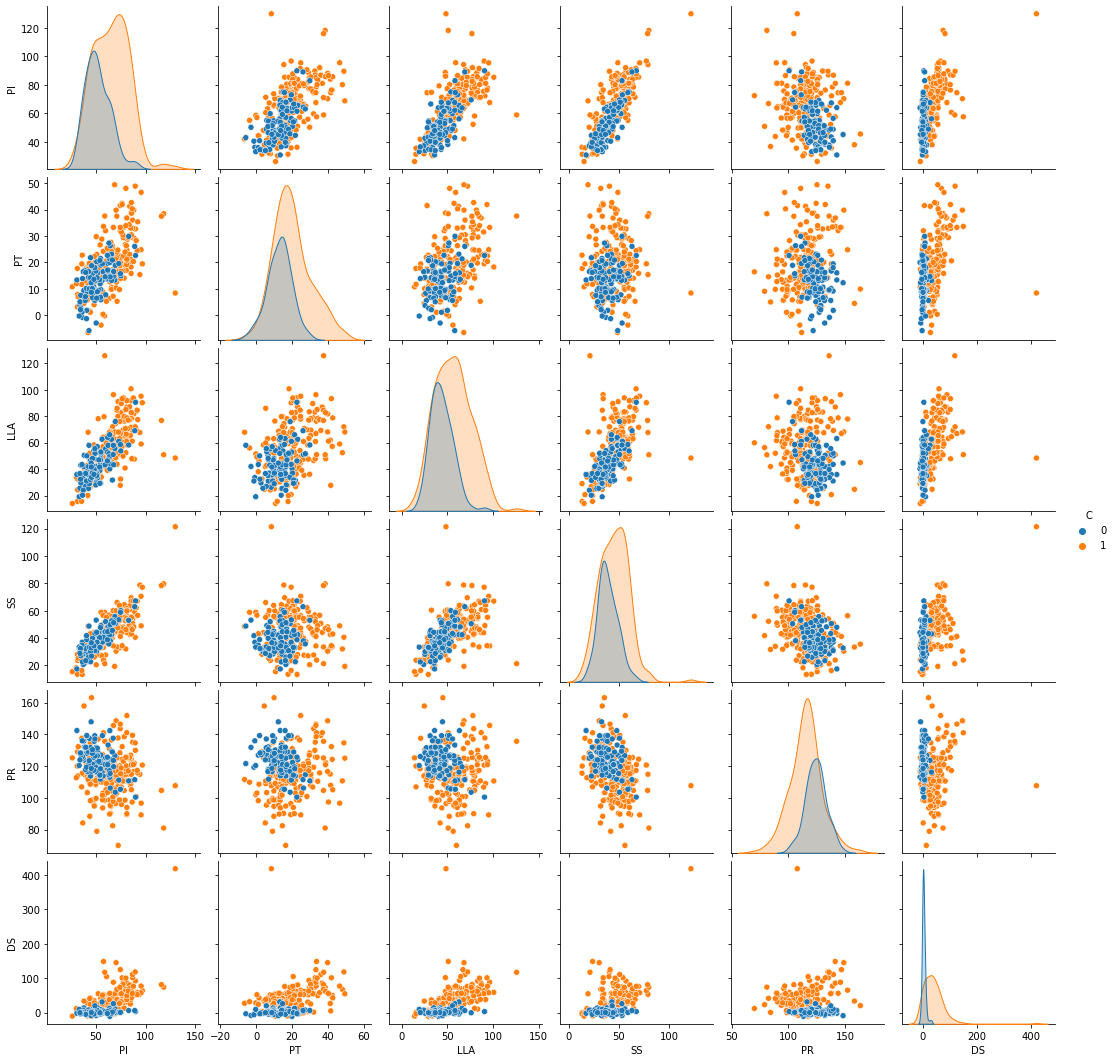

In [6]:
sns.pairplot(df,hue = "C",kind = 'scatter')

Question (b)

(ii)Make boxplots for each of the independent variables. Use color to show
Classes 0 and 1

[Text(0.5, 0, 'Class (0:Normal; 1:Abnormal)')]

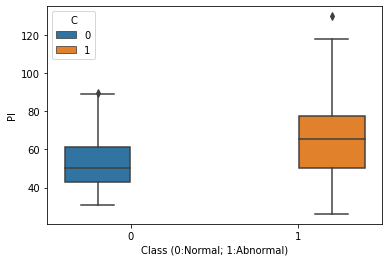

In [7]:
sns.boxplot(x=df['C'],y=df['PI'],hue=df['C']).set(xlabel='Class (0:Normal; 1:Abnormal)')

[Text(0.5, 0, 'Class (0:Normal; 1:Abnormal)')]

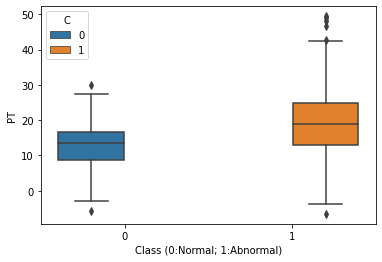

In [8]:
sns.boxplot(x=df['C'],y=df['PT'],hue=df['C']).set(xlabel='Class (0:Normal; 1:Abnormal)')

[Text(0.5, 0, 'Class (0:Normal; 1:Abnormal)')]

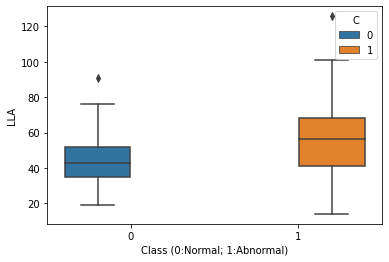

In [9]:
sns.boxplot(x=df['C'],y=df['LLA'],hue=df['C']).set(xlabel='Class (0:Normal; 1:Abnormal)')

[Text(0.5, 0, 'Class (0:Normal; 1:Abnormal)')]

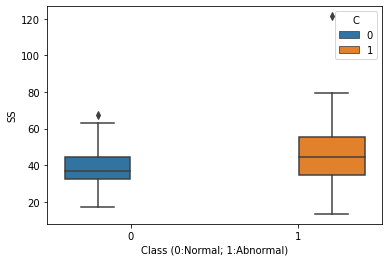

In [10]:
sns.boxplot(x=df['C'],y=df['SS'],hue=df['C']).set(xlabel='Class (0:Normal; 1:Abnormal)')

[Text(0.5, 0, 'Class (0:Normal; 1:Abnormal)')]

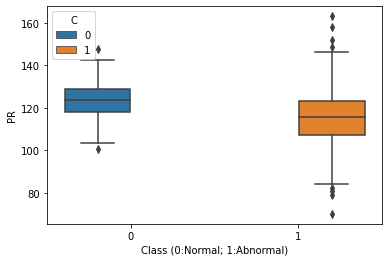

In [11]:
sns.boxplot(x=df['C'],y=df['PR'],hue=df['C']).set(xlabel='Class (0:Normal; 1:Abnormal)')

[Text(0.5, 0, 'Class (0:Normal; 1:Abnormal)')]

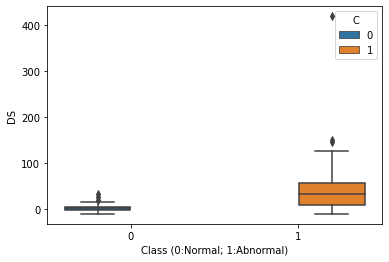

In [12]:
sns.boxplot(x=df['C'],y=df['DS'],hue=df['C']).set(xlabel='Class (0:Normal; 1:Abnormal)')

Question (b)

(iii)Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the
training set and the rest of the data as the test set.

In [13]:
train_0=df[df.C==0].iloc[:70]
train_1=df[df.C==1].iloc[:140]
train_set=train_0.append(train_1)
train_set

,PI,PT,LLA,SS,PR,DS,C
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0
...,...,...,...,...,...,...,...
135,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607,1
136,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083,1
137,83.396606,34.310989,78.423293,49.085617,110.466516,49.672096,1
138,72.054034,24.700737,79.874016,47.353297,107.172358,56.426159,1


In [14]:
test_0=df[df.C==0].iloc[70:]
test_1=df[df.C==1].iloc[140:]
test_set=test_0.append(test_1)
test_set

,PI,PT,LLA,SS,PR,DS,C
280,50.086153,13.430044,34.457541,36.656108,119.134622,3.089484,0
281,64.261507,14.497866,43.902504,49.763642,115.388268,5.951454,0
282,53.683380,13.447022,41.584297,40.236358,113.913703,2.737035,0
283,48.995958,13.113820,51.873520,35.882137,126.398188,0.535472,0
284,59.167612,14.562749,43.199158,44.604863,121.035642,2.830504,0
...,...,...,...,...,...,...,...
205,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,1
206,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,1
207,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,1
208,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,1


Question (c) Classification using KNN on Vertebral Column Data Set

(i) Write code for k-nearest neighbors with Euclidean metric (or use a software
package).

(ii)Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for
k (208; 205; ....7; 4; 1; )(in reverse order). You are welcome to use smaller
increments of k. Which k* is the most suitable k among those values? Cal-
culate the confusion matrix, true positive rate, true negative rate, precision,
and F1-score when k = k*. (25 pts)

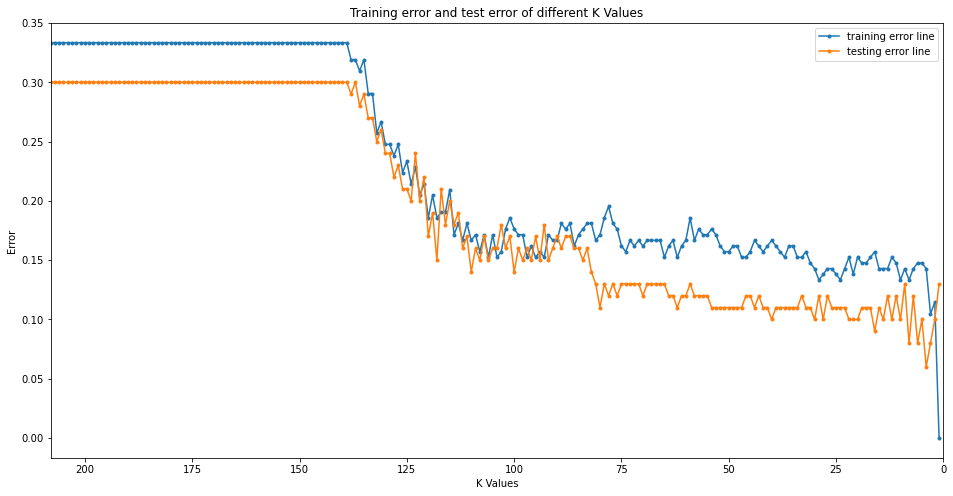

The best K (K*) is when K=4.


In [16]:
#KNNClassifier=KNeighborsClassifier(p=2,metric='euclidean',n_jobs=-1)
train_set_x=train_set.iloc[:,:6].values
train_set_y=train_set.iloc[:,6].values
#KNNClassifier.fit(train_set_x,train_set_y)
test_set_x=test_set.iloc[:,:6].values
test_set_y=test_set.iloc[:,6].values

training_error=[]
for i in range (208,0,-1):
    KNNClassifier=KNeighborsClassifier(n_neighbors=i,p=2,metric='euclidean',n_jobs=-1)
    KNNClassifier.fit(train_set_x,train_set_y)
    train_prediction_y=KNNClassifier.predict(train_set_x)
    training_error.append(np.mean(train_prediction_y != train_set_y))

testing_error=[]
for i in range (208,0,-1):
    KNNClassifier=KNeighborsClassifier(n_neighbors=i,p=2,metric='euclidean',n_jobs=-1)
    KNNClassifier.fit(train_set_x,train_set_y)
    test_prediction_y=KNNClassifier.predict(test_set_x)
    testing_error.append(np.mean(test_prediction_y != test_set_y))


#summary_list=[[]]
#for i in range (0,208,1):
    #summary_list[i][0].append(int(i))
    #summary_list[i][1].append(training_error[len(training_error)-i-1])
    #summary_list[i][2].append(testing_error[len(testing_error)-i-1])
#summary_list

x_coordinates = []
for i in range(208,0,-1):
    x_coordinates.append(i)

plt.figure(figsize=(16,8))
plt.plot(x_coordinates,training_error,label = 'training error line',marker=".")
plt.xlim(208,0)
plt.plot(x_coordinates,testing_error,label = 'testing error line',marker=".")
plt.title('Training error and test error of different K Values')
plt.xlabel('K Values')
plt.ylabel('Error')
plt.legend()
plt.show()
    
BestK = len(testing_error)-testing_error.index(np.min(testing_error))
print("The best K (K*) is when K="+str(BestK)+".")


According to the above graph, the most suitable K should be when K equals to 4, where it has the lowest test error and also very low training error.

In [17]:
BestClassifier=KNeighborsClassifier(n_neighbors=4,p=2,metric='euclidean',n_jobs=-1)
BestClassifier.fit(train_set_x,train_set_y)
Best_prediction_y=BestClassifier.predict(test_set_x)
print("Below is the Confusion Matrix when K*=4")
print(confusion_matrix(test_set_y,Best_prediction_y))
matrix = confusion_matrix(test_set_y,Best_prediction_y)


Below is the Confusion Matrix when K*=4
[[25  5]
 [ 1 69]]


In [19]:
true_positive_rate = recall_score(test_set_y,Best_prediction_y)
true_negative_rate = matrix[0][0]/(matrix[0][0]+matrix[0][1])
precision = precision_score(test_set_y,Best_prediction_y)
f1_Score = f1_score(test_set_y,Best_prediction_y)

print("True positive rate =", format(true_positive_rate,'.4f'))
print("True negative rate =", format(true_negative_rate,'.4f'))
print("Precision =", format(precision,'.4f'))
print("F1-score =", format(f1_Score,'.4f'))


True positive rate = 0.9857
True negative rate = 0.8333
Precision = 0.9324
F1-score = 0.9583


Question (c)

(iii) 

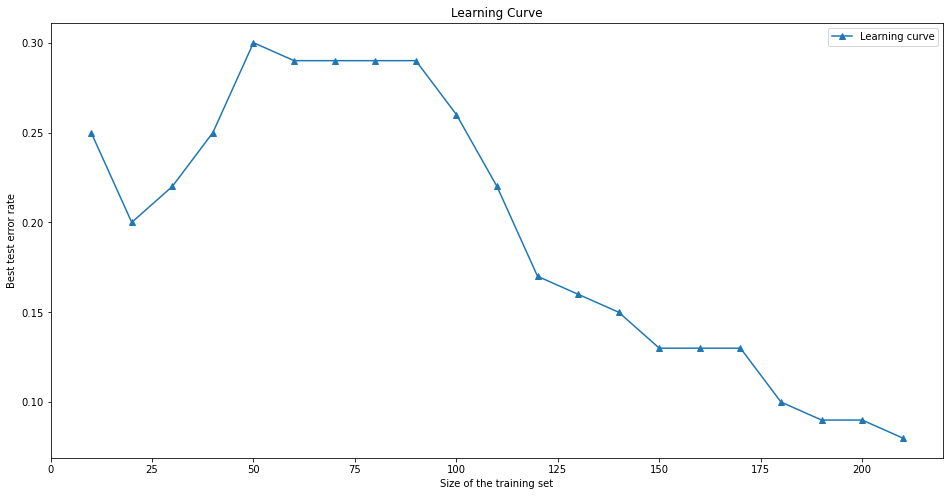

In [21]:
training_size=[]
error_min_kvalue=[]
for i in range(10,220,10):
    num0=math.floor(i/3)
    num1=i-num0
    new_train_0=train_0.iloc[:num0,:]
    new_train_1=train_1.iloc[:num1,:]
    new_train_set=new_train_0.append(new_train_1)
    new_train_set_x=new_train_set.iloc[:,:6].values
    new_train_set_y=new_train_set.iloc[:,6].values
    new_error={}
    for j in range (1,i+1,5):
        newClassifier=KNeighborsClassifier(n_neighbors=j,p=2,metric='euclidean',n_jobs=-1)
        newClassifier.fit(new_train_set_x,new_train_set_y)
        new_y_prediction=newClassifier.predict(test_set_x)
        new_error[j] = np.mean(new_y_prediction != test_set_y)
    error_min=min(new_error, key=new_error.get)
    training_size.append(i)
    error_min_kvalue.append(new_error[error_min])

plt.figure(figsize=(16,8))
plt.plot(training_size,error_min_kvalue,label = 'Learning curve',marker="^")
plt.title('Learning Curve')
plt.xlabel('Size of the training set')
plt.ylabel('Best test error rate')
plt.legend()
plt.show()

Extra Credits
(d)

(i)
A

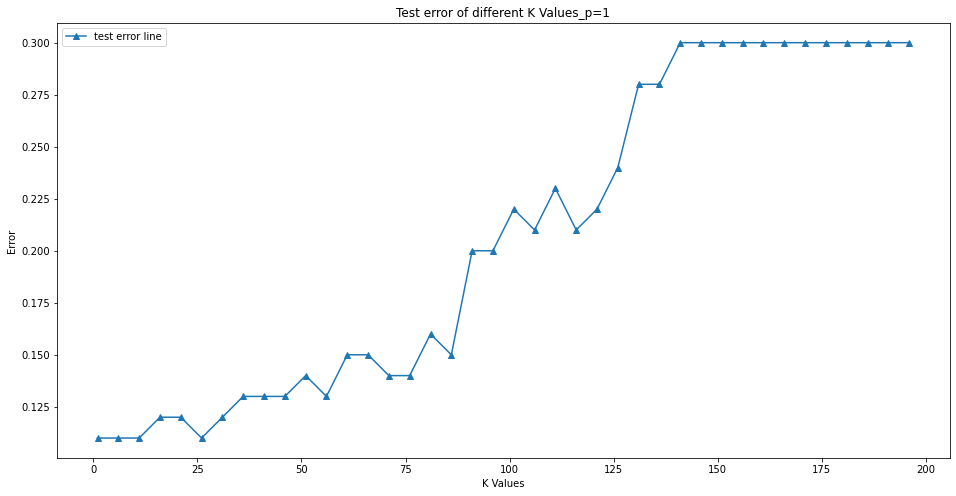

[0.11, 0.11, 0.11, 0.12, 0.12, 0.11, 0.12, 0.13, 0.13, 0.13, 0.14, 0.13, 0.15, 0.15, 0.14, 0.14, 0.16, 0.15, 0.2, 0.2, 0.22, 0.21, 0.23, 0.21, 0.22, 0.24, 0.28, 0.28, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]
Minimum test error is: 0.11
The best K to use is: 26


In [22]:
ecError=[]
best_k_value=0
k_value_list=[]
for i in range (1,197,5):
    NewClassifier=KNeighborsClassifier(n_neighbors = i,p=1,metric='manhattan',n_jobs=-1)
    NewClassifier.fit(train_set_x,train_set_y)
    y_prediction=NewClassifier.predict(test_set_x)    
    ecError.append(np.mean(y_prediction != test_set_y))
    k_value_list.append(i)
    if np.mean(y_prediction != test_set_y) == min(ecError):
        best_k_value=i
        
plt.figure(figsize=(16,8))
plt.plot(k_value_list,ecError,label = 'test error line',marker="^")
plt.title('Test error of different K Values_p=1')
plt.xlabel('K Values')
plt.ylabel('Error')
plt.legend()
plt.show()

print(ecError)
print("Minimum test error is:",min(ecError))
print("The best K to use is:",best_k_value)


In [23]:
BestNewClassifier=KNeighborsClassifier(n_neighbors=26,p=1,metric='manhattan',n_jobs=-1)
BestNewClassifier.fit(train_set_x,train_set_y)
Best_New_prediction_y=BestNewClassifier.predict(test_set_x)
print("Below is the Confusion Matrix when K*=26:")
print(confusion_matrix(test_set_y,Best_New_prediction_y))
print("Test error information is summarized below:")
print(creport(test_set_y, Best_New_prediction_y))


Below is the Confusion Matrix when K*=26:
[[20 10]
 [ 1 69]]
Test error information is summarized below:
              precision    recall  f1-score   support

           0       0.95      0.67      0.78        30
           1       0.87      0.99      0.93        70

    accuracy                           0.89       100
   macro avg       0.91      0.83      0.86       100
weighted avg       0.90      0.89      0.88       100



Some References Used:
1. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
3.https://stackoverflow.com/questions/3282823/get-the-key-corresponding-to-the-minimum-value-within-a-dictionary
4.https://seaborn.pydata.org/introduction.html
5.https://matplotlib.org/3.3.3/api/markers_api.html
6.https://www.w3resource.com/graphics/matplotlib/basic/matplotlib-basic-exercise-5.php
7.https://usc.zoom.us/rec/share/T1lAWLHnwCy4XdhKQU5A_VId18Meno2-TbE2JRDgBPz6i_Jr2g_1JljzffYhdN43.77u7n-gLuPTwLbr3?startTime=1612548134000 (Discussion 2)